In [1]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Loading and preparing our dataset

In [2]:
#Loading the dataset
dataset = load_iris()

#Building a dataframe from the dataset
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#Correlation between variables
abs(df.drop('species', axis=1).corr())*100

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),100.000000,11.756978,87.175378,81.794113
sepal width (cm),11.756978,100.000000,42.844010,36.612593
petal length (cm),87.175378,42.844010,100.000000,96.286543
petal width (cm),81.794113,36.612593,96.286543,100.000000


The correlation between petal length and petal width is very high. Hence, we shoud drop one of the two columns. I will drop 'petal length'.

In [4]:
#Dropping 'petal length'
df.drop('petal length (cm)', axis=1, inplace=True)

#Classical Logistic Regression model training

In [5]:
#Shuffling the dataset
df = df.sample(frac = 1)

#Splitting the dataset into training and testing sets
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

#Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Model evaluation using metrics

In [6]:
#Getting predictions
y_pred = model.predict(X_test)

##a. Model accuracy

In [7]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  92.10526315789474


After training our model, we were able to get an accuracy of about 92.1%, which is **very high**.

##b. Confusion Matrix

In [8]:
#Getting the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred)

#Displaying the confusion matrix
labels = dataset.target_names
c_mat_dict = {
    labels[0] : list(c_mat[0]),
    labels[1] : list(c_mat[1]),
    labels[2] : list(c_mat[2])
}
print ("{:<15} | {:<15} | {:<15} | {:<15}".format('', labels[0], labels[1], labels[2]))
print('----------------------------------------------------------------------------')
for k, v in c_mat_dict.items():
    a, b, c = v
    print ("{:<15} | {:<15} | {:<15} | {:<15}".format(k, a, b, c))
    print('----------------------------------------------------------------------------')

                | setosa          | versicolor      | virginica      
----------------------------------------------------------------------------
setosa          | 12              | 0               | 0              
----------------------------------------------------------------------------
versicolor      | 0               | 15              | 1              
----------------------------------------------------------------------------
virginica       | 0               | 2               | 8              
----------------------------------------------------------------------------


The confusion matrix shows that the classification is **almost perfect**, except for two instances of 'verginica' that were falsly classified as 'versicolor', and one of 'versicolor' falsly classified as 'verginica'.

##c. ROC curve

The ROC curve can only be used for binary classification problems. In order to be able to use it for a multi-class problem like this one, we will have to plot three curves : setosa vs. versicolor, setosa vs. virginica, versicolor vs. virginica.

However, we can deduce from our confusion matrix that the only ROC curve in need of plotting is that of versicolor vs. virginica. The two others are the same as that of a perfect model.

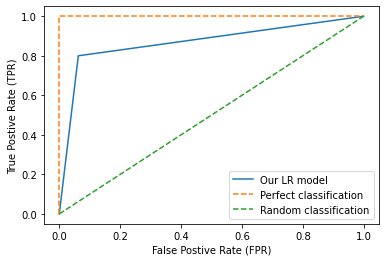

In [9]:
#Getting the y_test and y_pred of versicolor vs. virginica only
y_test = pd.Series.to_numpy(y_test)
arr = np.stack((y_test, y_pred), axis=1)
arr = np.delete(arr, np.where((arr == 0))[0], axis=0)
y_test = arr[:, 0]
y_pred = arr[:, 1]

#Getting TPR and FPR
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=2)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='Our LR model')
plt.plot([0, 0, 1], [0, 1, 1], label='Perfect classification', linestyle='dashed')
plt.plot([0, 1], [0, 1], label='Random classification', linestyle='dashed')
plt.legend()
plt.xlabel('False Postive Rate (FPR)')
plt.ylabel('True Postive Rate (TPR)')
plt.show()

From the plot, it is clear that the model's ROC curve for versicolor vs. virginica is **fairly close to that of a perfect model**. The other two already being the same as that of a perfect model, we can deduce that our model is bery well trained.